# SIN WAVE 
# Generate a sine wave of specific frequency for specified time duration.

Enter Total Time ( in Seconds ) : 2
Enter Frequency ( in Hz ) : 1


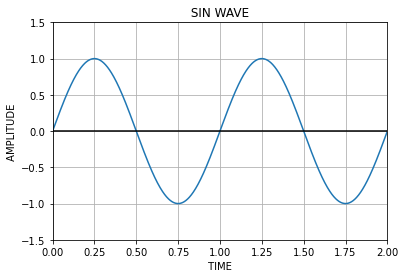

In [1]:

import matplotlib.pyplot as plot
import numpy as np
time = float (input("Enter Total Time ( in Seconds ) : "))
freq = float (input("Enter Frequency ( in Hz ) : "))

# Sampling rate 1000 hz / second
t = np.linspace(0, time , 1000 , endpoint=True)

# Plot the sin wave signal
plot.plot(t, np.sin(2 * np.pi * freq * t))

# Give a title for the sin wave plot
plot.title(' SIN WAVE ')

# Give x axis label for the sin wave plot
plot.xlabel(' TIME ')

# Give y axis label for the sin wave plot
plot.ylabel(' AMPLITUDE ')

plot.grid(True, which='both')

# Provide x axis and line color
plot.axhline(y=0, color='k')

# Set the max and min values for y axis
plot.ylim(-1.5, 1.5)
plot.xlim( 0, time )

# Display the square wave drawn
plot.show()




# SINE WAVE NOISE

Enter Total Time ( in Seconds ) : 2
Enter Frequency ( in Hz ) : 1


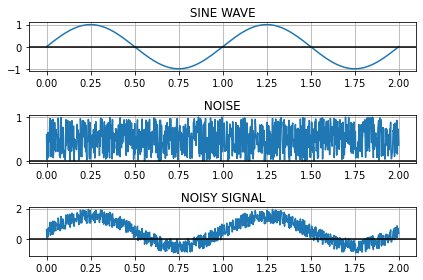

In [2]:
import matplotlib.pyplot as plt
import numpy as np

time = float (input("Enter Total Time ( in Seconds ) : "))
freq = float (input("Enter Frequency ( in Hz ) : "))

# Sampling rate 1000 hz / second
t = np.linspace(0, time , 1000 , endpoint = True)
y = np.sin(2 * np.pi * freq * t)
noise = np.random.rand(len(y))
corrupt = y + noise


plt.subplot (3,1,1)
plt.title (" SINE WAVE ")
plt.plot (t,y)
plt.grid (which= "Both")
plt.axhline(y=0, color='k')

plt.subplot (3,1,2)
plt.title (" NOISE ")
plt.plot(t,noise)
plt.grid (which= "Both")
plt.axhline(y=0, color='k')

plt.subplot (3,1,3)
plt.title (" NOISY SIGNAL ")
plt.plot (t,corrupt)
plt.grid (which= "Both")
plt.axhline(y=0, color='k')

plt.tight_layout()
plt.show()

# SQUARE WAVE
# Construct a square wave using multiple sine waves.   

Enter Time period ( in Sec ) : 50


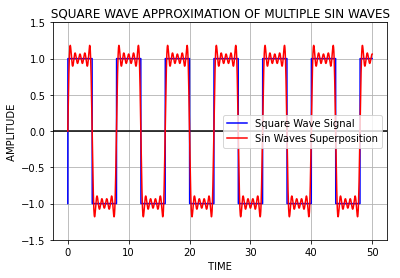

In [6]:
import numpy as np
import matplotlib.pyplot as plt

time = float (input("Enter Time period ( in Sec ) : "))
# Setup
x_ = np.linspace(0,time,10000)

T = 8
harmonics = 10
# func to form the square wave
def squareWave(x):
    global T
    lowerBoundLeft = (-T/2)
    lowerBoundRight = 0
    upperBoundLeft = 0
    upperBoundRight = (T/2)
    one = 1
    negativeOne = -1

    while True:
        if (x >= lowerBoundLeft) and (x <= lowerBoundRight):
            return negativeOne
        elif (x >= upperBoundLeft) and (x <= upperBoundRight):
            return one
        else:
            lowerBoundLeft -= T/2
            lowerBoundRight -= T/2
            upperBoundLeft += T/2
            upperBoundRight += T/2
            if one == 1:
                one = -1
                negativeOne = 1
            else:
                one = 1
                negativeOne = -1

# fourier coeff --> bn
def bn(n):
    n = int(n)
    if (n%2 != 0):
        return 4/(np.pi*n)
    else:
        return 0

# fourier coeff --> an
def an (n):
    global T
    an = (2*np.pi*n)/T
    return an

# Fourier Series function
def fourierSeries(n_max,x):
    a0 = 0
    partialSums = a0
    for n in range(1,n_max):
        try:
            partialSums = partialSums + bn(n)*np.sin(an(n)*x)
        except:
            print("pass")
            pass
    return partialSums

y = []
f = []
for i in x_:
    y.append(squareWave(i))
    f.append(fourierSeries(harmonics,i))

plt.grid( True , which='both')
plt.axhline (y=0 , color='k')
plt.plot(x_,y,color="blue", label="Square Wave Signal" ,)
plt.plot(x_,f,color="red" , label="Sin Waves Superposition")
plt.legend(loc = "upper right")
plt.ylim(-1.5,1.5)
plt.xlabel(" TIME ")
plt.ylabel(" AMPLITUDE ")
plt.title(" SQUARE WAVE APPROXIMATION OF MULTIPLE SIN WAVES ")
plt.legend()
plt.show()

